In [102]:
# text summarization

from datasets import load_from_disk, load_dataset
import os
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt



## 1. Téléchargement et préparation du jeu de données

### Téléchargement et Pretraitement du jeu de données CNN/Daily Mail depuis Hugging Face Datasets.

In [ ]:
if os.path.exists("cnn_daily_v3/train"):
    ds = load_from_disk("cnn_daily_v3/train", )
else:
    ds = load_dataset("abisee/cnn_dailymail", "3.0.0", split="train")


In [ ]:
# ds.save_to_disk("cnn_daily_v3")

Saving the dataset (0/3 shards):   0%|          | 0/287113 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/13368 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/11490 [00:00<?, ? examples/s]

In [98]:
# Division des donnees en train/validation/test 80/10/10
X_train, X_test, y_train, y_test = train_test_split(ds["article"], ds["highlights"], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [101]:
aa=len(ds["article"])
train_size=100*len(X_train)/aa
val_size=100*len(X_val)/aa
test_size=100*len(X_test)/aa
print(f"train size : {round(train_size)}%,\nvalidation size : {round(val_size)}%,\ntest size : {round(test_size)}%")

train size : 80%,
validation size : 10%,
test size : 10%


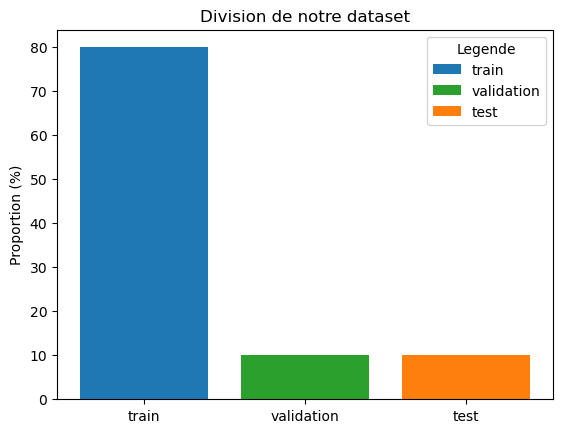

In [ ]:
fig, ax = plt.subplots()

alabls = ['train', 'validation', 'test']
ahght = [train_size, val_size, test_size]
bar_labels = alabls
bar_colors = ['tab:blue', 'tab:green', 'tab:orange']
ax.bar(alabls, ahght, label=bar_labels, color=bar_colors)

ax.set_ylabel('Proportion (%)')
ax.set_title('Division de notre dataset')
ax.legend(title='Legende')

plt.show()
fig.savefig("proportions.png")

## 2. Modèle de résumé extractif (Utiliser le jeu de données de tests uniquement)

## 3. Modèle de résumé abstrait (Encoder-Decoder)

Architecture :

Utiliser une architecture Transformer (BART ou T5).

Entraînement du modèle :

Utiliser les textes comme entrées pour l’encodeur et les résumés comme cibles pour le décodeur.
Définir la fonction de perte et une méthode d’optimisation adaptées.
Entraîner le modèle sur le jeu d'entraînement et valider sur le jeu de validation.


In [ ]:
## 

from transformers import BartTokenizer

# Charger le tokenizer BART
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

# Fonction de tokenisation
def tokenize_data(examples):
    inputs = examples['article']
    targets = examples['summary']
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    # Tokeniser le résumé
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=150, truncation=True)

    model_inputs['labels'] = labels['input_ids']
    return model_inputs

# Appliquer la tokenisation aux jeux de données d'entraînement et de validation
train_dataset = train_dataset.map(tokenize_data, batched=True)
val_dataset = val_dataset.map(tokenize_data, batched=True)

# Définir les colonnes à garder
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

## 4. Évaluation des performances

Génération de résumés :

Générer des résumés à partir du jeu de test pour l’approche abstraite.

Comparaison des approches :

Évaluer les résumés générés (abstrait et extractif) en utilisant les métriques ROUGE et BLEU.
Comparer les scores et analyser les résultats.


In [ ]:
from datasets import load_metric
metric = load_metric('glue', 'mrpc') # egalement [bleu, rouge, bertscore, bleurt, coval, gleu, glue, meteor, sacrebleu, seqeval, squad, squad_v2, xnli]
# Example of typical usage
for batch in dataset:
    inputs, references = batch
    predictions = model(inputs)
    metric.add_batch(predictions=predictions, references=references)
score = metric.compute()

## 5. Expérimentations additionnelles (option)

### Tests sur d'autres sources :

Tester les modèles sur des textes provenant d'autres sources pour évaluer la généralisation.

### Variantes du modèle :

Expérimenter avec différents modèles pré-entraînés (GPT) et différentes configurations des architectures (taille des couches, nombre d'époques).

### Exploration de techniques avancées :

Tester des techniques comme la régularisation ou l'ajout de contraintes pour améliorer la qualité des résumés.


## 6. Questions de réflexion

### Analyse des limites :
Quelles sont les limites des modèles pour resumé extractifs par rapport aux modèles pour resumé abstraits ?
Quelles sont les limites des modèles encoder-decoder dans les tâches de résumé de texte ?
Comment améliorer la performance du modèle sur des textes complexes ou longs ?

## 7. Ressources
Dataset CNN/Daily Mail pour le résumé de texte
Bibliothèques recommandées :
Hugging Face Transformers pour les modèles pré-entraînés.
Scikit-learn pour les évaluations et la préparation des données.
NLTK ou SpaCy pour le traitement du langage naturel.

## Livrables

### Dépôt GitHub :

Créer un dépôt contenant le code, les notebooks d’analyse, et un fichier README expliquant comment exploiter votre code.

### Rapport final :

Inclure une analyse comparative des performances, des graphiques et des réflexions sur les deux approches.

### Images & Captures d'écran :

Ajouter des images et captures d'écran des résultats des évaluations, y compris les métriques ROUGE et BLEU.
